# Radiating dipole example

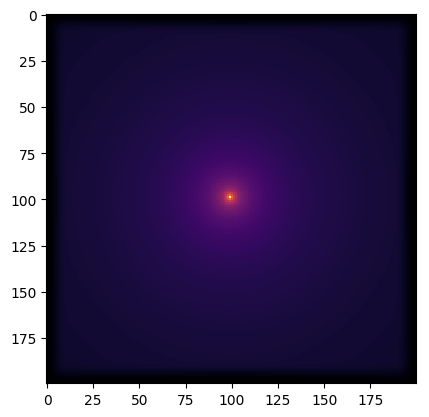

In [3]:
include("./fdfd.jl");
import PyPlot
import fdfd

omega = 2*pi*200e12
N = (200,200);
Npml = (15,15)
xrange = (-2.5e-6,2.5e-6);
yrange = (-2.5e-6,2.5e-6);

eps_r = ones(N);
region_func(x,y) = -0.25e-6<=x<=0.25e-6 && -0.1e-6<=y<=0.1e-6;
fdfd.assign_val!(eps_r, region_func, 1, xrange, yrange);

Jz = zeros(Complex128,N)
Jz[100,100]=-1im

(Ez, Hx, Hy) = fdfd.solve_driven_TM(omega, xrange, yrange, eps_r, Jz, Npml);
PyPlot.imshow(abs.(Ez), cmap="inferno")
PyPlot.show()

# Photonic waveguide transition

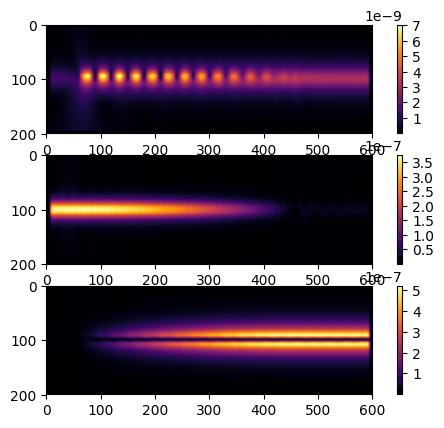

In [6]:
include("./fdfd.jl");

omega0 = 2*pi*1.939e14;
Omega = 4.541e14;
Nsb = 1;
N = (600,200);
Npml = (15,10)
xrange = (0,15e-6);
yrange = (-1e-6,1e-6);

eps_r = ones(N);
mod_reg = zeros(N);
mod_phi = zeros(N);

a = 0.2202e-6
region_wg(x,y) = -a/2<=y<=a/2;
region_modulation(x,y) = 1.5e-6<=x<=11.7e-6 && -a/2<=y<=0;

q = 2.9263e6;
modulation_phase(x,y) = q*x;

fdfd.assign_val!(eps_r, region_wg, 12.25, xrange, yrange);
fdfd.assign_val!(mod_reg, region_modulation, 1, xrange, yrange);
fdfd.assign_val_func!(mod_phi, region_modulation, modulation_phase, xrange, yrange);

Jz0 = zeros(Complex128,N)
fdfd.assign_modal_source!("TM", omega0, omega0/fdfd.c0*3.5, Jz0, eps_r, [1e-6,0], "x", 61, N, xrange, yrange)
#PyPlot.imshow(abs.(Jz0).',cmap="magma")
#PyPlot.show()
(Ez, Hx, Hy, omega) = fdfd.solve_modulation_TM(omega0, Omega, Nsb, xrange, yrange, eps_r, mod_reg, mod_phi, Jz0, Npml);

PyPlot.subplot(3,1,1);
Z = Ez[1,:,:].';
PyPlot.imshow(abs.(Z),cmap="inferno");
PyPlot.colorbar()
PyPlot.subplot(3,1,2);
Z = Ez[2,:,:].';
PyPlot.imshow(abs.(Z),cmap="inferno");
PyPlot.colorbar()
PyPlot.subplot(3,1,3);
Z = Ez[3,:,:].';
PyPlot.imshow(abs.(Z),cmap="inferno");
PyPlot.colorbar()
PyPlot.show();